In [1]:
import pandas as pd
import numpy as np
import os
import random

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

In [3]:
df_train = pd.read_csv(r'C:\Users\User\Documents\Code\ML\MLP_From_Scratch\data\processed\train.csv')
df_val = pd.read_csv(r'C:\Users\User\Documents\Code\ML\MLP_From_Scratch\data\processed\val.csv')
df_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,1.672515,-1.510435,1.152931,0.672503,-0.480441,0.396490,0.700531,-0.898959,-0.332946,...,-0.342402,0.150095,1.410420,-0.017924,-0.652749,-1.251944,2.184899,-0.896069,-0.251523,-1.349705
1,0,-1.130588,0.084327,1.327840,0.328979,-2.247525,0.381566,-0.656651,1.732308,-0.485647,...,0.009259,-0.075653,-0.750143,-1.093124,0.935465,-0.867296,-1.352040,0.327212,1.542169,1.463560
2,0,0.730073,-0.124934,0.367563,1.066249,-1.119075,1.812515,1.208193,2.444878,-1.340102,...,-1.213309,-0.909460,0.685469,0.775192,-0.609208,1.265331,0.516367,0.718250,-0.095598,-0.079082
3,0,-0.148097,1.245156,0.055094,-0.471695,-1.078914,-0.248510,0.171784,1.175016,-0.456331,...,-1.541725,-0.074329,0.529493,-0.505968,0.118007,0.646468,-0.950750,1.318108,-0.958576,-1.154944
4,0,-0.960483,-0.576551,-0.152929,0.486752,0.224779,-0.484962,1.138139,-1.299598,0.883744,...,-0.515184,0.266691,1.200330,0.486047,1.404336,0.337141,0.118691,1.375879,-0.261072,0.386433


In [4]:
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']
X_val = df_val.drop('target', axis=1)
y_val = df_val['target']
print(X_train.shape, y_train.shape)

(159999, 200) (159999,)


Epoch 1/50, Train Loss: 0.5887, Val Loss: 0.2811
Epoch 11/50, Train Loss: 0.2562, Val Loss: 0.2383
Epoch 21/50, Train Loss: 0.2542, Val Loss: 0.2373
Epoch 31/50, Train Loss: 0.2534, Val Loss: 0.2369
Epoch 41/50, Train Loss: 0.2536, Val Loss: 0.2370
Epoch 50/50, Train Loss: 0.2541, Val Loss: 0.2368


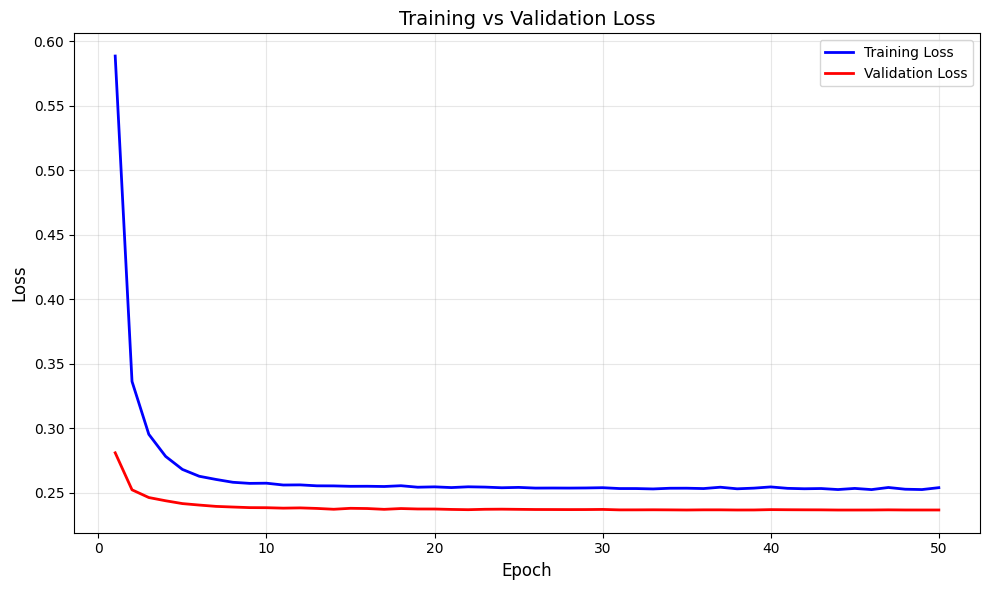

In [ ]:
from model import MLP
clf = MLP(X_train, y_train, 0.005, 0.75)
clf.train(256, 50, X_val, y_val)
clf.plot_losses()

In [6]:
def evaluate(y_pred, y_true):
    y_true = y_true.to_numpy().reshape(-1, 1)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

In [7]:
y_pred = clf.predict(X_val)
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = evaluate(y_pred_binary, y_val)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9104


In [8]:
df_test = pd.read_csv(r'C:\Users\User\Documents\Code\ML\MLP_From_Scratch\data\processed\test.csv')
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,0.125013,2.324754,0.845226,1.288454,0.218434,0.340616,0.505578,0.503056,0.556466,...,-1.180832,1.459483,-2.273597,-0.220929,-1.363780,1.821461,0.378506,1.967159,-0.131504,-0.517002
1,test_1,-0.709290,0.713124,0.221913,-0.790719,-1.158435,0.133428,0.701799,0.609509,-1.407976,...,1.620022,0.462065,-0.668261,1.701550,-0.768339,0.430016,-0.694916,1.045653,1.080989,-1.691385
2,test_2,-1.712251,-2.154840,-0.218099,0.121669,-0.502184,1.888395,-0.593971,1.083766,0.373309,...,-0.872240,1.176265,0.036101,-0.288740,-1.596779,1.584518,-1.726653,-2.005330,1.335052,-1.902512
3,test_3,-0.706987,0.076794,0.493065,-0.110091,-1.375009,1.046177,-0.542468,1.175074,0.929083,...,1.390574,0.542035,-0.182183,0.062157,-0.892548,2.310104,0.303521,0.348605,-0.945580,-0.084966
4,test_4,0.335695,0.370570,1.289736,0.465977,-1.216274,-0.447429,1.669536,-1.737309,0.813109,...,0.218598,0.573698,-0.435821,0.011199,0.501422,-0.103805,-1.369360,-1.759479,-0.644139,-0.561548


In [9]:
X_test = df_test.drop('ID_code', axis=1)
y_test_pred = clf.predict(X_test)
submission = pd.DataFrame({'ID_code': df_test['ID_code'], 'target': y_test_pred.flatten()})
submission.to_csv(r'C:\Users\User\Documents\Code\ML\MLP_From_Scratch\data\processed\submission.csv', index=False)